In [4]:
import spotipy
from sklearn.preprocessing import MinMaxScaler
from spotipy import SpotifyOAuth, SpotifyClientCredentials
import pandas as pd
from api_ref import CLIENT_SECRET, CLIENT_ID, REDIRECT_URI
import numpy as np

In [5]:
def get_top_song_features(time_range):
    """Takes in the identification of the API user in order to generate the top tracks over the three ranges allowed,
    short, medium, and long. Then gathers the song features for each track into a separate dataframe for each range,
    stored in a list."""

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                                   client_secret=CLIENT_SECRET,
                                                   redirect_uri=REDIRECT_URI,
                                                   scope='user-top-read'))

    top_tracks = sp.current_user_top_tracks(time_range=time_range, limit=50)
    top_ids = []
    while (top_tracks != None):
        top_ids.append([i['id'] for i in top_tracks['items']])
        top_tracks = sp.next(top_tracks)

    client_cred_manager = SpotifyClientCredentials(client_id=CLIENT_ID,
                                                   client_secret=CLIENT_SECRET)
    sp = spotipy.Spotify(client_credentials_manager=client_cred_manager)
    sp.trace = False

    audio_features = []

    for set in top_ids:
        audio_features.extend(sp.audio_features(set))

    df_audio_features = pd.DataFrame(audio_features)

    scaler = MinMaxScaler()

    features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']
    temp_data = [scaler.fit_transform(df_audio_features[features])]
    df_scaled = pd.DataFrame(columns=features, data=temp_data[0])
    return df_scaled


In [6]:
df_short, df_medium, df_long = get_top_song_features('short_term'), get_top_song_features('medium_term'), get_top_song_features('long_term')

In [7]:
df_short.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.500639,0.568776,0.575776,0.038397,0.531259,0.001475,0.098517,0.038707,0.575454
1,0.795658,0.535201,0.697977,0.111700,0.150597,0.000000,0.360169,0.189102,0.185352
2,0.713921,0.677893,0.732926,0.035989,0.110101,0.000000,0.293432,0.185858,0.594808
3,0.913155,0.588711,0.661806,0.118922,0.003282,0.004457,0.090042,0.167478,0.475704
4,0.731801,0.940195,0.830292,0.060424,0.098053,0.000214,0.023305,0.765380,0.513489


In [8]:
df_medium.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.905046,0.465766,0.768977,0.058392,0.010822,0.000000,0.117586,0.193805,0.266716
1,0.749365,0.689899,0.756924,0.035186,0.557689,0.000066,0.092612,0.675400,0.320812
2,0.831070,0.640774,0.827317,0.093362,0.046551,0.000000,0.058273,0.117429,0.458897
3,0.779176,0.479071,0.738888,0.044468,0.669026,0.000000,0.098855,0.420813,0.399790
4,0.812300,0.674547,0.837006,0.223961,0.007168,0.000014,0.094693,0.297762,0.567938


In [9]:
df_long.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.455285,0.332519,0.685676,0.031027,0.874497,0.000000,0.092612,0.357798,0.599556
1,0.799797,0.660155,0.791462,0.329140,0.139551,0.000000,0.100937,0.517839,0.525197
2,0.817073,0.503460,0.740254,0.273585,0.050795,0.000001,0.110302,0.622834,0.326538
3,0.721545,0.903337,0.862247,0.123690,0.086037,0.115108,0.167534,0.565749,0.653176
4,0.544715,0.488197,0.797951,0.082704,0.142563,0.000000,0.149844,0.187564,0.447510


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
correlation = df_medium.corr()

<Axes: >

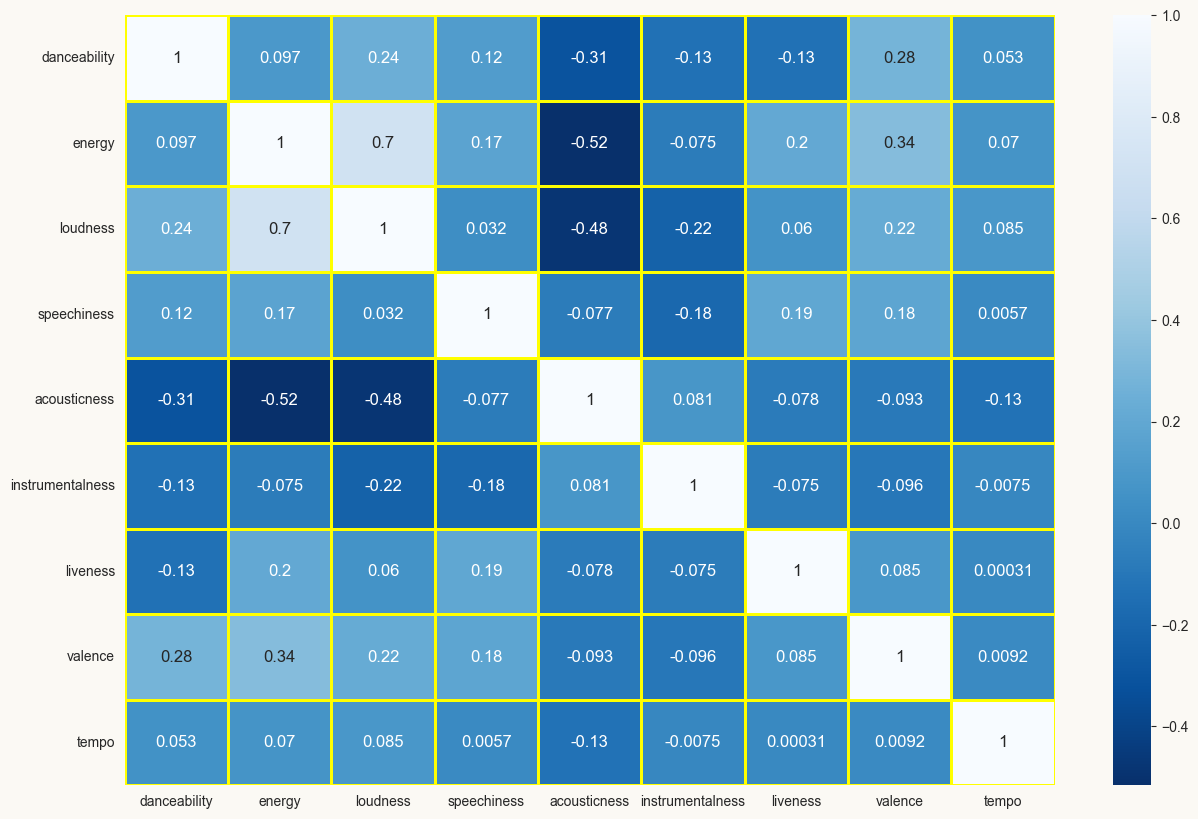

In [12]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor("#fbf9f4")
fig.set_facecolor("#fbf9f4")
sns.color_palette("mako", as_cmap=True)
sns.heatmap(correlation, annot=True, annot_kws={"size": 12}, cmap="Blues_r", linewidths=2, linecolor='yellow')

<Axes: ylabel='tempo'>

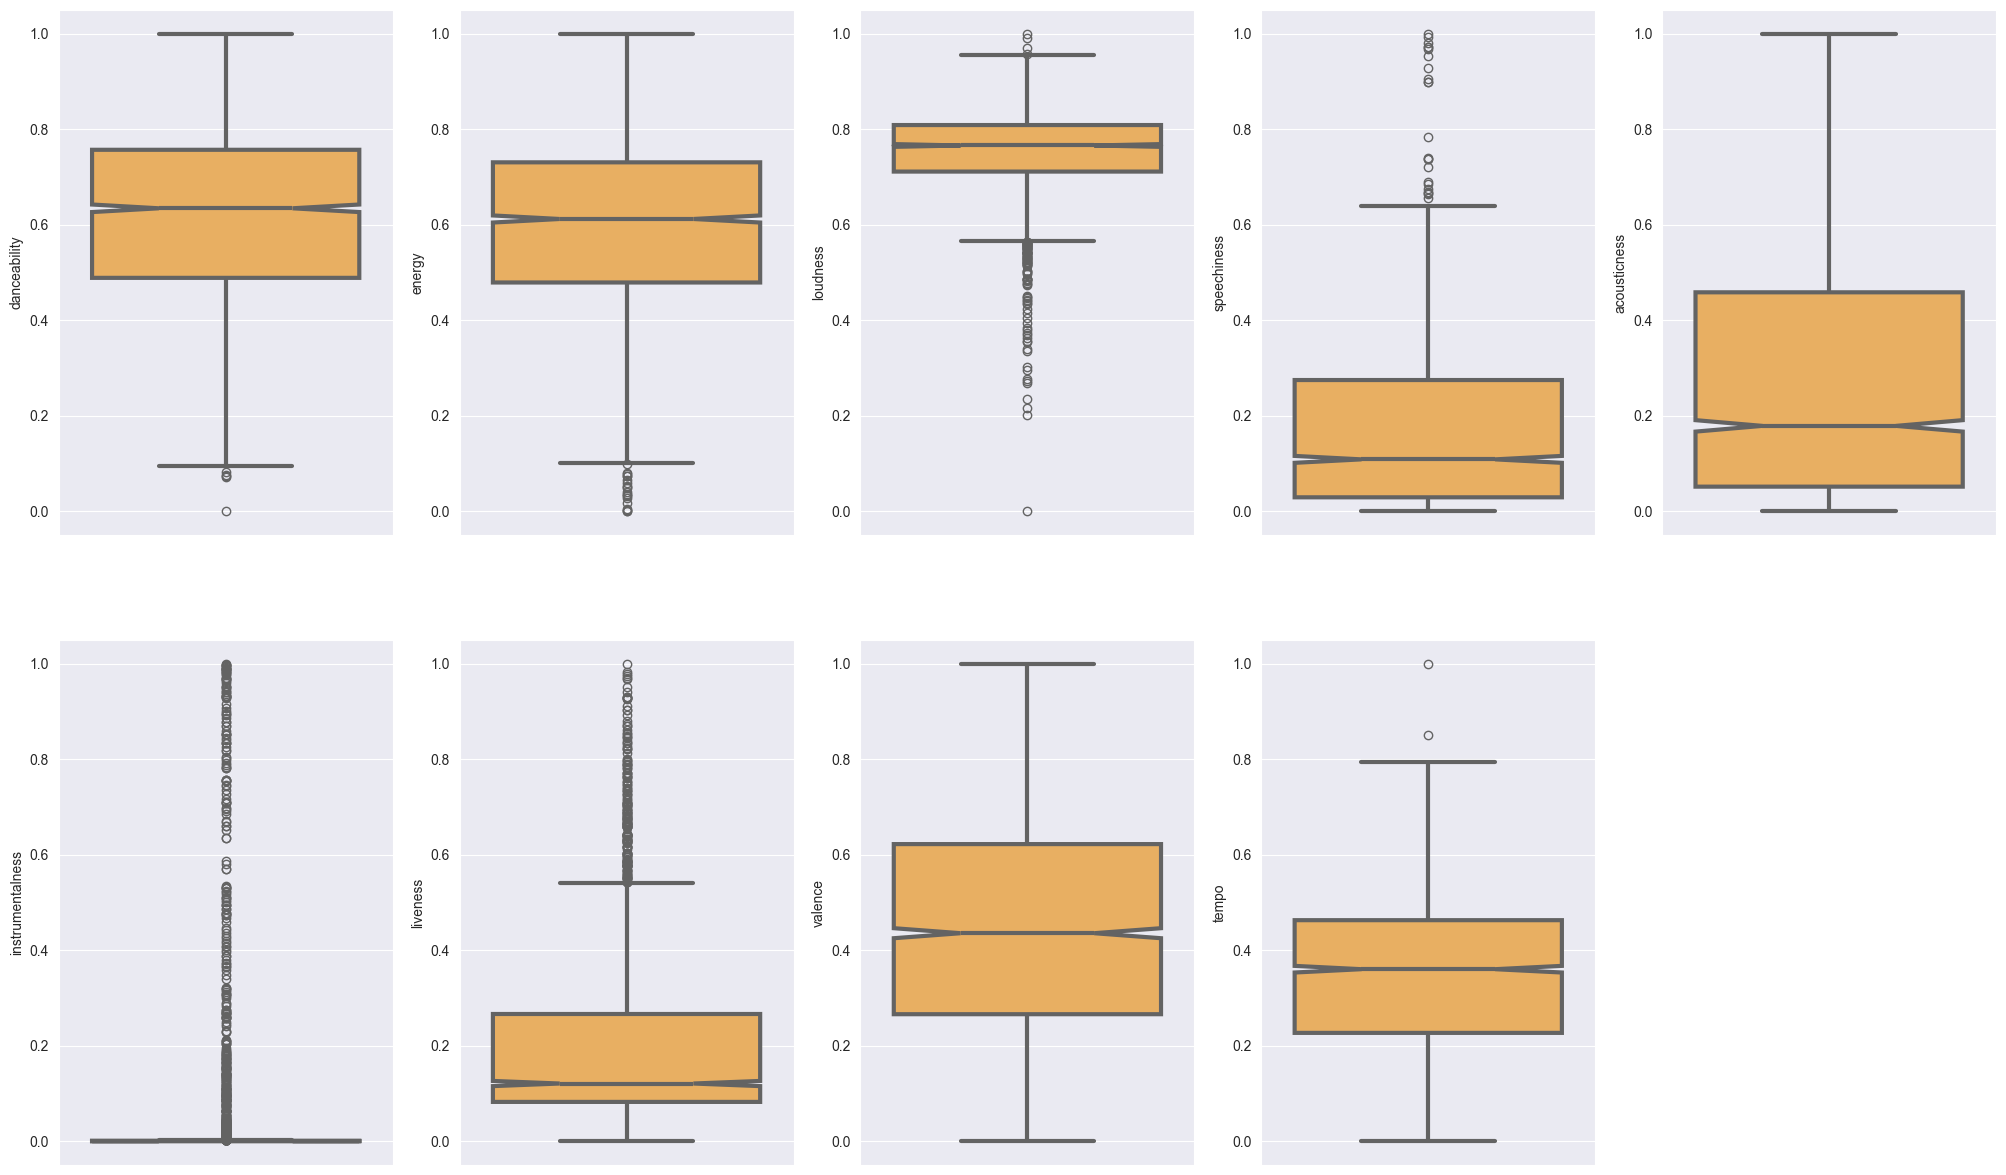

In [13]:
fig = plt.figure(figsize = (25,15))

fig.add_subplot(2, 5, 1)
sns.boxplot(y=df_medium['danceability'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 2)
sns.boxplot(y=df_medium['energy'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 3)
sns.boxplot(y=df_medium['loudness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 4)
sns.boxplot(y=df_medium['speechiness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 5)
sns.boxplot(y=df_medium['acousticness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 6)
sns.boxplot(y=df_medium['instrumentalness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 7)
sns.boxplot(y=df_medium['liveness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 8)
sns.boxplot(y=df_medium['valence'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 9)
sns.boxplot(y=df_medium['tempo'], color="#feb24c", linewidth=3, notch = True)

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

Text(0, 0.5, 'cumulative explained variance')

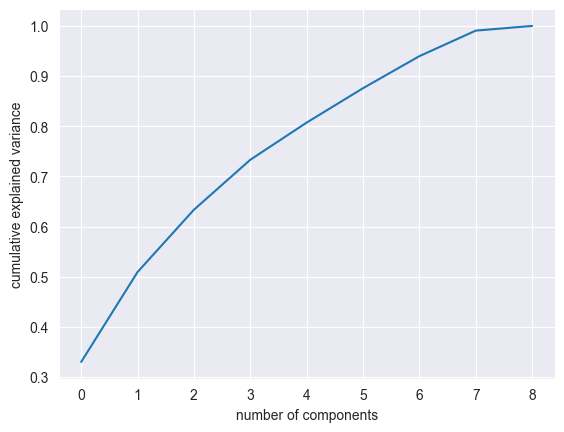

In [15]:
pca = PCA().fit(df_medium)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

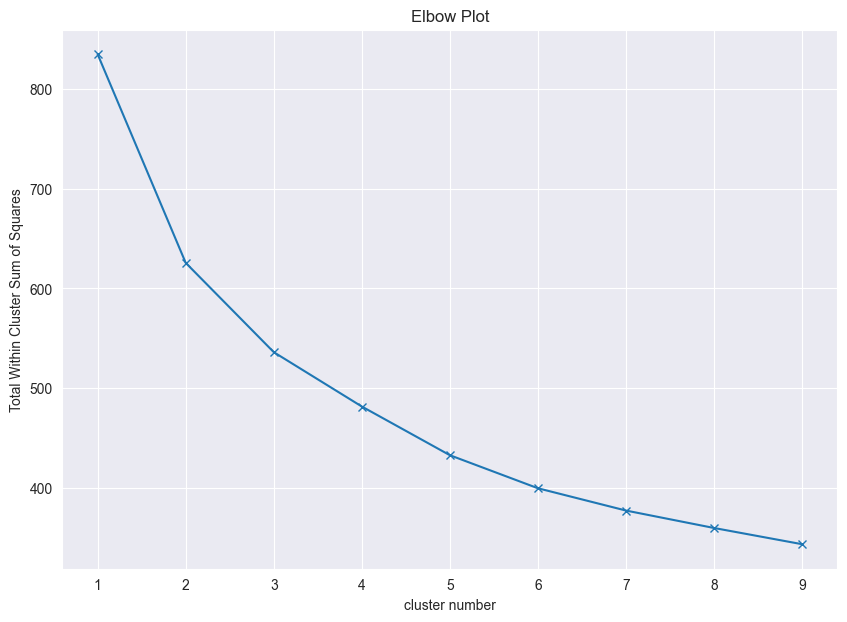

In [16]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df_medium)

pcadf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, n_init=25)
 kmeans.fit(pcadf)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K,Sum_of_squared_distances, 'x-')
plt.xlabel('cluster number') 
plt.ylabel('Total Within Cluster Sum of Squares') 
plt.title('Elbow Plot')
plt.show()

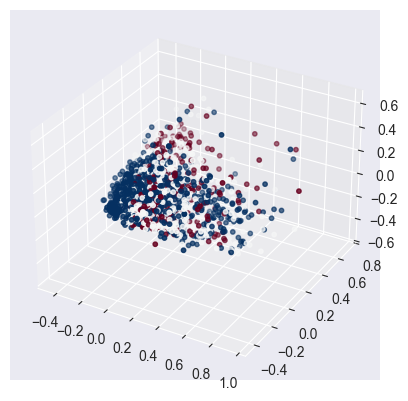

In [17]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df_medium)

pcadf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

kmeans2 = KMeans(n_clusters=3, random_state=0, n_init=25, algorithm='lloyd') 
kmeans2.fit(pcadf)

pcadf.insert(0, "Cluster", kmeans2.labels_, True)

xcol = "PC3"
ycol = "PC5"
zcol = 'PC7'
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs = np.array(pcadf[xcol]), ys=np.array(pcadf[ycol]), zs=np.array(pcadf[zcol]), c=pcadf['Cluster'], s=10, cmap="RdBu")

plt.show()